In [23]:
import numpy as np
import pandas as pd
import pegasus as pg
import json
import os
import pegasusio
from pegasusio import UnimodalData, MultimodalData
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches
import itertools
import random
import matplotlib.cm
import glob
from collections import Counter, OrderedDict
import matplotlib.colors as mcolors
from matplotlib.gridspec import GridSpec
from utils.utils import *
from utils.plot_utils import *

# DEG related numbers

In [2]:
# mast intersect wilcox SIG DEG 

masts = []
wilcoxs = []

ptsd_ups = []
ptsd_downs = []

for s in subtypes:
    print(s)
    ptsd_mast = pd.read_csv(f'/gpfs/gibbs/pi/girgenti/JZhang/commonData/PTSD/RNA/results/062522_DEG/subclass/mast/PTSD_vs_CON/{s}_SIG_DEG.csv',sep='\t')
    ptsd_wilcox = pd.read_csv(f'/gpfs/gibbs/pi/girgenti/JZhang/commonData/PTSD/RNA/results/062522_DEG/subclass/wilcox/PTSD_vs_CON/{s}_SIG_DEG.csv',sep='\t')
    masts.append([x for x in ptsd_mast.primerid if x in protein_coding])
    wilcoxs.append([x for x in ptsd_wilcox.index if x in protein_coding])
    
    # intersect mast and wilcox up
    ptsd_mast_up = ptsd_mast[ptsd_mast.coef > 0]
    ptsd_wilcox_up = ptsd_wilcox[ptsd_wilcox.avg_log2FC > 0]
    inter = list(set(ptsd_mast_up.primerid)&set(ptsd_wilcox_up.index))
    #inter = [x for x in inter if x in protein_coding]
    x_up = ptsd_mast_up[ptsd_mast_up.primerid.isin(inter)]
    ptsd_up_celltype = pd.DataFrame({'Genename':x_up.primerid.values,'Subclass':s,'FC':x_up.coef.values,'FDR':x_up.fdr.values}).reset_index(drop=True)
    
    # intersect mast and wilcox down
    ptsd_mast_down = ptsd_mast[ptsd_mast.coef < 0]
    ptsd_wilcox_down = ptsd_wilcox[ptsd_wilcox.avg_log2FC < 0]
    inter = list(set(ptsd_mast_down.primerid)&set(ptsd_wilcox_down.index))
    #inter = [x for x in inter if x in protein_coding]
    x_down = ptsd_mast_down[ptsd_mast_down.primerid.isin(inter)]
    ptsd_down_celltype = pd.DataFrame({'Genename':x_down.primerid.values,'Subclass':s,'FC':x_down.coef.values,'FDR':x_down.fdr.values}).reset_index(drop=True)

    ptsd_ups.append(ptsd_up_celltype)
    ptsd_downs.append(ptsd_down_celltype)

CUX2
RORB
FEZF2
OPRK1
LAMP5
KCNG1
VIP
SST
PVALB
OLI
OPC
END
AST
MIC


In [3]:
masts = list(itertools.chain(*masts))
len(list(set(masts)))

4491

In [4]:
wilcoxs = list(itertools.chain(*wilcoxs))
len(list(set(wilcoxs)))

2092

In [5]:
ptsd_ups = pd.concat(ptsd_ups)
ptsd_downs = pd.concat(ptsd_downs)

In [6]:
deg_df = pd.concat([ptsd_ups,ptsd_downs],axis=0)
deg_df = deg_df[deg_df.Genename.isin(protein_coding)]

In [7]:
len(deg_df.Genename.unique())

1142

In [9]:
x = deg_df[deg_df.Subclass.isin(['CUX2','RORB','FEZF2','OPRK1'])]

In [10]:
len(x[x.FC > 0].Genename.unique())

226

# Figure 2a: DEG count figures

In [11]:
# mast intersect wilcox SIG DEG

ptsd_ups = []
ptsd_downs = []

for s in subtypes:
    print(s)
    ptsd_mast = pd.read_csv(f'/gpfs/gibbs/pi/girgenti/JZhang/commonData/PTSD/RNA/results/062522_DEG/subclass/mast/PTSD_vs_CON/{s}_SIG_DEG.csv',sep='\t')
    ptsd_wilcox = pd.read_csv(f'/gpfs/gibbs/pi/girgenti/JZhang/commonData/PTSD/RNA/results/062522_DEG/subclass/wilcox/PTSD_vs_CON/{s}_SIG_DEG.csv',sep='\t')
    
    ptsd_mast_up = ptsd_mast[ptsd_mast.coef > 0]
    ptsd_wilcox_up = ptsd_wilcox[ptsd_wilcox.avg_log2FC > 0]
    inter = list(set(ptsd_mast_up.primerid)&set(ptsd_wilcox_up.index))
    x_up = ptsd_mast_up[ptsd_mast_up.primerid.isin(inter)]
    ptsd_up_celltype = pd.DataFrame({'Genename':x_up.primerid.values,'Subclass':s,'FC':x_up.coef.values,'FDR':x_up.fdr.values}).reset_index(drop=True)
    
    ptsd_mast_down = ptsd_mast[ptsd_mast.coef < 0]
    ptsd_wilcox_down = ptsd_wilcox[ptsd_wilcox.avg_log2FC < 0]
    inter = list(set(ptsd_mast_down.primerid)&set(ptsd_wilcox_down.index))
    x_down = ptsd_mast_down[ptsd_mast_down.primerid.isin(inter)]
    ptsd_down_celltype = pd.DataFrame({'Genename':x_down.primerid.values,'Subclass':s,'FC':x_down.coef.values,'FDR':x_down.fdr.values}).reset_index(drop=True)

    ptsd_ups.append(ptsd_up_celltype)
    ptsd_downs.append(ptsd_down_celltype)

CUX2
RORB
FEZF2
OPRK1
LAMP5
KCNG1
VIP
SST
PVALB
OLI
OPC
END
AST
MIC


In [12]:
ptsd_ups = pd.concat(ptsd_ups)
ptsd_downs = pd.concat(ptsd_downs)

In [13]:
deg_df = pd.concat([ptsd_ups,ptsd_downs],axis=0)
deg_df = deg_df[deg_df.Genename.isin(protein_coding)]

In [14]:
counts_up = deg_df[deg_df.FC > 0].Subclass.value_counts()

In [15]:
counts_down = deg_df[deg_df.FC < 0].Subclass.value_counts()

In [18]:
minColor = .45
maxColor = 0
blue_t = truncate_colormap(plt.get_cmap("coolwarm"), minColor, maxColor)
red_t = truncate_colormap(plt.get_cmap("coolwarm_r"), minColor, maxColor)

       Down        Up
0  3.401197  5.231109
1  3.178054  3.931826
2  2.833213  3.091042
3  3.258097  4.094345


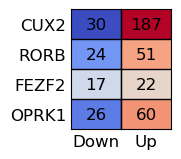

In [24]:
DEG_counts_plot([counts_up[x] for x in exc_subtypes],[counts_down[x] for x in exc_subtypes],exc_subtypes,'EXN')

       Down        Up
0  3.784190  3.713572
1  3.433987  2.708050
2  3.135494  3.332205
3  2.708050  2.995732
4  3.332205  3.637586


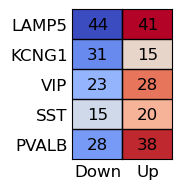

In [25]:
DEG_counts_plot([counts_up[x] for x in inh_subtypes],[counts_down[x] for x in inh_subtypes], inh_subtypes,'INH')

In [26]:
deg_ups = []
deg_downs = []
for s in ['EXC','INH','OLI','OPC','END','AST','MIC']:
    deg_up = pd.read_csv(f'/gpfs/gibbs/pi/gerstein/jz435/ShareZhangLab/PTSD/RNA/mast_wilcox_intersected_DEG/{s}_PTSD_UP.csv',header=None)[0].values
    deg_down = pd.read_csv(f'/gpfs/gibbs/pi/gerstein/jz435/ShareZhangLab/PTSD/RNA/mast_wilcox_intersected_DEG/{s}_PTSD_DOWN.csv',header=None)[0].values
    deg_ups.append(len(deg_up))
    deg_downs.append(len(deg_down))

       Down        Up
0  4.219508  5.420535
1  4.624973  4.356709
2  3.637586  2.484907
3  2.772589  2.564949
4  5.846439  5.087596
5  4.189655  4.753590
6  4.553877  2.995732


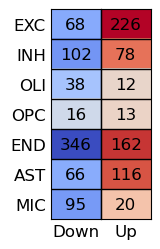

In [27]:
DEG_counts_plot(deg_ups,deg_downs,celltypes,'ALL')

# Figure 2b: DEG yes or no

In [28]:
N=1142

In [29]:
degs = []
for s in ['EXC','INH','OLI','OPC','END','AST','MIC']:
    deg_up = pd.read_csv(f'/gpfs/gibbs/pi/gerstein/jz435/ShareZhangLab/PTSD/RNA/mast_wilcox_intersected_DEG/{s}_PTSD_UP.csv',header=None)[0].values
    deg_down = pd.read_csv(f'/gpfs/gibbs/pi/gerstein/jz435/ShareZhangLab/PTSD/RNA/mast_wilcox_intersected_DEG/{s}_PTSD_DOWN.csv',header=None)[0].values
    deg_up_down = list(itertools.chain(*[deg_up,deg_down]))
    degs.append(deg_up_down)

In [30]:
# shared DEG across EXC and INH
len(list(set(degs[0]) & set(degs[1])))

63

In [31]:
len(list(set(np.append(degs[0],degs[1]))))

411

In [36]:
# shared DEG across all celltypes
len(list(set.intersection(*map(set, degs))))

0

In [37]:
all_degs = list(set(list(itertools.chain(*degs))))

In [38]:
len(all_degs)

1142

In [39]:
all_vals = []
for i in range(7):
    vals = []
    for deg in all_degs:
        if deg in degs[i]:
            val = 1
        else:
            val = 0
        vals.append(val)
    all_vals.append(vals)
arr = np.array(all_vals)

In [42]:
df = pd.DataFrame(arr.T,columns=celltypes,index=all_degs)

In [43]:
df1 = df.sort_values(by=celltypes,ascending=False)

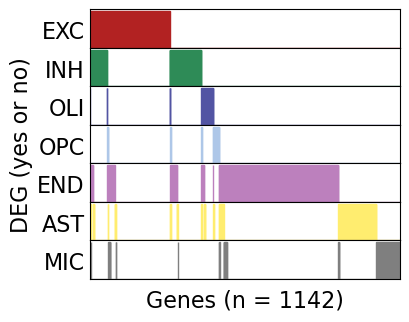

In [45]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.size'] = '16'

colors = list(celltype_colors.values())
fig, ax = plt.subplots(7,1,sharex=True,figsize=(4,3.5),frameon=True)
ax = ax.flatten()

for ii,s in enumerate(celltypes):
    df1[[s]].plot.bar(ax=ax[ii],width=1,color=colors[ii],edgecolor=colors[ii])
    ax[ii].get_legend().remove()
    ax[ii].set_xticks([])
    ax[ii].set(yticks=np.array([0.5]),yticklabels=[s])
    #ax[ii].set(frame_on=False)
    ax[ii].tick_params(axis=u'both', which=u'both',length=0)
ax[3].set_ylabel('DEG (yes or no)',rotation=90)
n_deg = df1.shape[0]

plt.xlabel(f'Genes (n = {n_deg})')

fig.subplots_adjust(wspace=0,hspace=0)


In [9]:
degs = pd.DataFrame({'PTSD Up':inter_ups_ptsd,'PTSD Down':inter_downs_ptsd,'MDD Up':inter_ups_mdd,'MDD Down':inter_downs_mdd},index=subclass)

In [352]:
degs_up = pd.DataFrame({'PTSD Up':inter_ups_ptsd,'MDD Up':inter_ups_mdd},index=subclass)

In [353]:
degs_down = pd.DataFrame({'PTSD Down':inter_downs_ptsd,'MDD Down':inter_downs_mdd},index=subclass)

# Figure 2c: DEG heatmap

In [67]:
top = []
for s in subtypes:
    mast = pd.read_csv(f'/gpfs/gibbs/pi/girgenti/JZhang/commonData/PTSD/RNA/results/062522_DEG/subclass/mast/PTSD_vs_CON/{s}_SIG_DEG.csv',sep='\t')
    wilcox = pd.read_csv(f'/gpfs/gibbs/pi/girgenti/JZhang/commonData/PTSD/RNA/results/062522_DEG/subclass/wilcox/PTSD_vs_CON/{s}_SIG_DEG.csv',sep='\t')
    inter = list(set(mast.primerid)&set(wilcox.index))
    x = mast[mast.primerid.isin(inter)]
    y = wilcox[wilcox.index.isin(inter)]
    x.fdr = x.fdr.replace(0,sorted(x.fdr.unique())[1])
    x['mlogfdr'] = -np.log10(x.fdr)
    x = x.sort_values(['mlogfdr'],ascending=[False])
    y.p_val_adj = y.p_val_adj.replace(0,sorted(y.p_val_adj.unique())[1])
    y['mlogfdr'] = -np.log10(y.p_val_adj)
    y = y.loc[x.primerid.values]
    df = pd.DataFrame({'subtype':s,'DEG':x.primerid.values,'mast fdr':x.mlogfdr.values,'mast fc':x.coef.values,'wilcox fdr':y.mlogfdr.values,'wilcox fc':y.avg_log2FC.values}).reset_index(drop=True)
    top.append(df)

/tmp/ipykernel_3989391/127218708.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.fdr = x.fdr.replace(0,sorted(x.fdr.unique())[1])
/tmp/ipykernel_3989391/127218708.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['mlogfdr'] = -np.log10(x.fdr)
/tmp/ipykernel_3989391/127218708.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

In [68]:
top = pd.concat(top)
top = top[top.DEG.isin(protein_coding)]

top_neural = top[top.subtype.isin(['CUX2','RORB','FEZF2','OPRK1','LAMP5','VIP','KCNG1','SST','PVALB'])].sort_values('mast fdr',ascending=False)
top_ex = top[top.subtype.isin(exc_subtypes)].sort_values('mast fdr',ascending=False)
top_in = top[top.subtype.isin(inh_subtypes)].sort_values('mast fdr',ascending=False)
top_neu_genes = top_neural[top_neural.DEG.isin(list(set(top_ex.DEG)&set(top_in.DEG)))].sort_values('mast fdr',ascending=False).DEG.value_counts()[:7].index

In [69]:
top_ex_genes = []
count = 0
for i in range(top_ex.shape[0]):
    if len(top_ex_genes) > 7:
        break
    else:
        deg = top_ex.iloc[i].DEG
        if deg not in top_ex_genes:
            top_ex_genes.append(deg)
        else:
            pass

In [70]:
top_in_genes = []
for i in range(top_in.shape[0]):
    if len(top_in_genes) > 7:
        break
    else:
        deg = top_in.iloc[i].DEG
        if deg not in top_in_genes:
            top_in_genes.append(deg)
        else:
            pass

In [73]:
top_ex_genes = top[top.subtype.isin(exc_subtypes)].sort_values('mast fdr',ascending=False)[:7].DEG.values
top_in_genes = top[top.subtype.isin(inh_subtypes)].sort_values('mast fdr',ascending=False)[:9].DEG.values

In [74]:
top_nn_genes = []
for s in ['OLI','OPC','END','AST','MIC']:
    top_s = top[top.subtype.isin([s])].sort_values('mast fdr',ascending=False)[:7].DEG.values
    top_nn_genes.append(top_s)

In [75]:
top_nn_genes = list(itertools.chain(*top_nn_genes))

In [76]:
all_top_genes = (list(top_ex_genes)+list(top_in_genes)+list(top_nn_genes))

In [77]:
len(all_top_genes)

51

In [78]:
all_top_genes_final = sorted(set(all_top_genes), key=all_top_genes.index)

In [79]:
len(all_top_genes_final)

46

In [80]:
new = top[top.DEG.isin(all_top_genes_final)]

In [84]:
vals = []
for ii,name in enumerate(new.subtype):
    if name in inh_subtypes:
        val = 'INH'
    elif name in exc_subtypes:
        val = 'EXC'
    else:
        val = name
    vals.append(val)
new.subtype = vals

/tmp/ipykernel_3989391/1210730146.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new.subtype = vals


In [85]:
all_top_genes_final = ['OTOGL', 'CALM1', 'BEX3', 'CLU', 'BEX1', 'ATP6AP1', 'B4GAT1',
                       'ANKRD55', 'PDE10A', 'SGCZ', 'ZNF804A', 'GRM5', 'MGAT4C',
                       'CTNNA2','ARPP21','CSMD3','PDE1A','MDGA2','CADM2','FKBP5', 
                       'RALYL','GPNMB','GPC5','CD81','PLPP4','RASD1',
                       'GPCPD1','HSPA1A','TPT1','EIF1','CD59','YBX3','CEBPD',
                       'LRRC4C','NCKAP5','LRRTM4','ITPKC','GFAP','ANGPTL4','HILPDA',
                       'HDAC9','ACTB','RAPGEF1','TMEM163','SLC11A1','PLTP']

In [99]:
fcs_all = []
for ii,gene in enumerate(all_top_genes_final):
    z = new[(new.DEG==gene)].reset_index(drop=True)
    fcs = []
    
    if 'EXC' in z.subtype.values:
        z_exc = z[z.subtype=='EXC']
        exc_fc = z_exc.loc[z_exc['mast fdr'].idxmax()]['mast fc']
    else:
        exc_fc = 0.0
    fcs.append(exc_fc)
    
    if 'INH' in z.subtype.values:
        z_inh = z[z.subtype=='INH']
        inh_fc = z_inh.loc[z_inh['mast fdr'].idxmax()]['mast fc']
    else:
        inh_fc = 0.0
    fcs.append(inh_fc)

    for j in ['OLI','OPC','END','AST','MIC']:
        if j in z.subtype.values:
            j_fc = z[z.subtype==j]['mast fc'].values[0]
        else:
            j_fc = 0.0
        fcs.append(j_fc)
    fcs_all.append(fcs)

In [88]:
fcs_all = np.array(fcs_all)

In [89]:
bulk_deg = pd.read_csv('/gpfs/gibbs/pi/gerstein/jz435/ShareZhangLab/PTSD/RNA/jiawei_ptsd_degs.csv')

In [90]:
bulk_genes = bulk_deg.Genename.values

In [92]:
bulk_df = bulk_deg[bulk_deg.Genename.isin(all_top_genes_final)]

In [93]:
bulk_vals = bulk_df.set_index('Genename').reindex(all_top_genes_final)['PTSD.dlPFC.log2FoldChange'].values

In [94]:
bulk_vals = bulk_vals.reshape(len(all_top_genes_final),1)

In [95]:
df = pd.DataFrame(fcs_all,index=all_top_genes_final)
df2 = df.reindex(all_top_genes_final)

In [96]:
df3 = df2[df2.columns[::-1]]

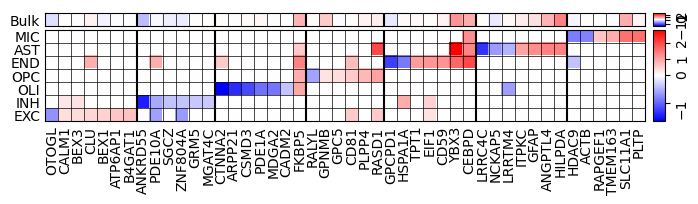

In [98]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.size'] = '10'

fig, ax = plt.subplots(2,1,figsize=(8,5))

norm = mcolors.TwoSlopeNorm(vcenter=0)
p2 = ax[1].imshow(np.array(df3).T,cmap='bwr',norm=norm)
ax[1].set_yticks(np.arange(len(celltypes)))
ax[1].set_yticklabels(celltypes[::-1])
ax[1].set_xticks(np.arange(len(all_top_genes_final)))
ax[1].set_xticklabels(all_top_genes_final,rotation=90)

p = ax[0].imshow(bulk_vals.T,cmap='bwr',norm=norm)
ax[0].set_yticks(np.arange(1))
ax[0].set_yticklabels(['Bulk'])
ax[0].set_xticks([])

from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
fig.subplots_adjust(hspace=-0.83, wspace=0)
divider = make_axes_locatable(ax[1])
cax2 = divider.append_axes("right", size="2%", pad=0.08)
cb2 = fig.colorbar(p2,ax=ax[1],cax=cax2)
cb2.set_ticks([-1,0,1,2])
cb2.ax.tick_params(rotation=90)

divider2 = make_axes_locatable(ax[0])
cax = divider2.append_axes("right", size="2%", pad=0.08)
cb = fig.colorbar(p,ax=ax[0],cax=cax)
cb.set_ticks([-1,0,1,2])
cb.ax.tick_params(rotation=90)

ax[1].set_yticks(np.arange(-0.5, len(celltypes)-1),minor=True)
ax[1].set_xticks(np.arange(-0.5, df3.shape[0]-1),minor=True)
ax[1].grid(which='minor', color='k', linewidth=0.5)
ax[1].grid(which='major',linewidth=0)
ax[1].tick_params(axis=u'both', which=u'both',length=0)

ax[0].set_xticks(np.arange(-0.5, df3.shape[0]-1),minor=True)
ax[0].grid(which='minor', color='k', linewidth=0.5)
ax[0].grid(which='major',linewidth=0)
ax[0].tick_params(axis=u'both', which=u'both',length=0)

for i in [ax[0],ax[1]]:
    for g in [7,13,20,26,33,40]:
        i.axvline(x=g-0.5,color='k')


# Figure 2e: FKBP5 FISH

In [100]:
import pzfx_parser
import seaborn as sns
from statannotations.Annotator import Annotator

In [101]:
deg_df[deg_df.Genename=='FKBP5']

,Genename,Subclass,FC,FDR
1,FKBP5,OLI,0.994671,1.008433e-280
3,FKBP5,OPC,0.896253,3.494868e-59
8,FKBP5,END,1.401992,7.855886e-130
8,FKBP5,AST,0.579111,0.000000e+00


In [42]:
flt1 = pzfx_parser.read_pzfx('/gpfs/gibbs/pi/gerstein/jz435/ShareZhangLab/PTSD/RNA/1FKBP5-2FLT1.pzfx')

In [43]:
df = flt1['FKBP5 when FLT>=5 ']

In [44]:
df = df.melt()

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Control_0 vs. PTSD_1: Mann-Whitney-Wilcoxon test two-sided, P_val:1.145e-03 U_stat=1.447e+04


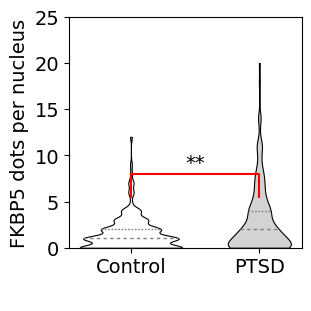

In [60]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.size'] = '14'

fig, ax = plt.subplots(figsize=(3,3))
p = sns.violinplot(data=df,x='variable',y='value',cut=0,bw=0.2,palette=['white','lightgray'],inner='quartile',color='k',linewidth=0.8)
ax.set(xticks=[0,1],xticklabels=['Control','PTSD'])
ax.set_ylim([0,25])
ax.set_ylabel('FKBP5 dots per nucleus')
ax.set_xlabel(' ')
for l in p.lines:
    l.set_linewidth(1)
ax.collections[0].set_edgecolor('k')
ax.collections[1].set_edgecolor('k')

annotator = Annotator(ax, [('Control_0','PTSD_1')], data=df, x='variable', y='value')
annotator.configure(test='Mann-Whitney', text_format='star', loc='inside', color='red',line_offset=5, line_height=0.1, use_fixed_offset=False)
annotator.apply_and_annotate()
plt.savefig('/home/ah2428/FLT1_violin.pdf',bbox_inches='tight',dpi=300)

# Figure 2f: PTSD vs MDD DEGs venn

In [16]:
ptsd_degs = []
for s in ['CUX2','RORB','FEZF2','OPRK1','LAMP5','KCNG1','VIP','SST','PVALB','OLI','OPC','END','AST','MIC']:
    mast = pd.read_csv(f'/gpfs/gibbs/pi/girgenti/JZhang/commonData/PTSD/RNA/results/062522_DEG/subclass/mast/PTSD_vs_CON/{s}_SIG_DEG.csv',sep='\t')
    
    mast = mast[np.abs(mast.coef) > np.log2(1.2)]
    mast_up = mast[mast.coef > 0].primerid.values
    mast_down = mast[mast.coef < 0].primerid.values
    
    wilcox = pd.read_csv(f'/gpfs/gibbs/pi/girgenti/JZhang/commonData/PTSD/RNA/results/062522_DEG/subclass/wilcox/PTSD_vs_CON/{s}_SIG_DEG.csv',sep='\t')
    wilcox = wilcox[np.abs(wilcox.avg_log2FC) > np.log2(1.2)]
    wilcox_up = wilcox[wilcox.avg_log2FC > 0].index.values
    wilcox_down = wilcox[wilcox.avg_log2FC < 0].index.values
    
    inter_up = list(set(mast_up) & set(wilcox_up))
    inter_down = list(set(mast_down) & set(wilcox_down))
    inter_up = [x for x in inter_up if x in protein_coding]
    inter_down = [x for x in inter_down if x in protein_coding]

    degs = np.append(inter_up,inter_down)
    ptsd_degs.append(degs)

In [17]:
mdd_degs = []
for s in ['CUX2','RORB','FEZF2','OPRK1','LAMP5','KCNG1','VIP','SST','PVALB','OLI','OPC','END','AST','MIC']:
    mast = pd.read_csv(f'/gpfs/gibbs/pi/girgenti/JZhang/commonData/PTSD/RNA/results/062522_DEG/subclass/mast/MDD_vs_CON/{s}_SIG_DEG.csv',sep='\t')
    
    mast = mast[np.abs(mast.coef) > np.log2(1.2)]
    mast_up = mast[mast.coef > 0].primerid.values
    mast_down = mast[mast.coef < 0].primerid.values
    
    wilcox = pd.read_csv(f'/gpfs/gibbs/pi/girgenti/JZhang/commonData/PTSD/RNA/results/062522_DEG/subclass/wilcox/MDD_vs_CON/{s}_SIG_DEG.csv',sep='\t')
    wilcox = wilcox[np.abs(wilcox.avg_log2FC) > np.log2(1.2)]
    wilcox_up = wilcox[wilcox.avg_log2FC > 0].index.values
    wilcox_down = wilcox[wilcox.avg_log2FC < 0].index.values
    
    inter_up = list(set(mast_up) & set(wilcox_up))
    inter_down = list(set(mast_down) & set(wilcox_down))
    inter_up = [x for x in inter_up if x in protein_coding]
    inter_down = [x for x in inter_down if x in protein_coding]

    degs = np.append(inter_up,inter_down)
    mdd_degs.append(degs)

In [19]:
ptsd_degs = list(set(list(itertools.chain(*ptsd_degs))))
mdd_degs = list(set(list(itertools.chain(*mdd_degs))))

In [21]:
len(ptsd_degs),len(mdd_degs)

(1142, 2389)

In [23]:
from matplotlib_venn import venn2, venn2_circles

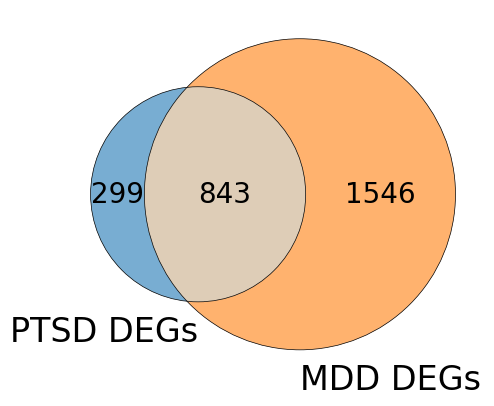

In [24]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.size'] = '20'

inter = len(list(set(ptsd_degs) & set(mdd_degs)))
venn2(subsets=(len(ptsd_degs)-inter, len(mdd_degs)-inter, inter), set_labels=('PTSD DEGs','MDD DEGs'),set_colors=('tab:blue','tab:orange'),alpha=0.6)
venn2_circles(subsets=(len(ptsd_degs)-inter, len(mdd_degs)-inter, inter),linewidth=0.5)
plt.savefig('/home/ah2428/ptsd_mdd_degs_venn.pdf',bbox_inches='tight',dpi=300)

# Figure 2g: PTSD 299 GO

In [2]:
bp = pd.read_csv('/gpfs/gibbs/pi/gerstein/jz435/ShareZhangLab/PTSD/RNA/PTSD_299_GO/BP.txt',sep='\t')
mf = pd.read_csv('/gpfs/gibbs/pi/gerstein/jz435/ShareZhangLab/PTSD/RNA/PTSD_299_GO/MF.txt',sep='\t')
syn = pd.read_csv('/gpfs/gibbs/pi/gerstein/jz435/ShareZhangLab/PTSD/RNA/PTSD_299_GO/SynGO.txt',sep='\t')

In [3]:
bp = bp[['Term','Adjusted P-value']]
bp['name'] = 'BP'
mf = mf[['Term','Adjusted P-value']]
mf['name'] = 'MF'
syn = syn[['Term','Adjusted P-value']]
syn['name'] = 'Syn'

In [4]:
n=7
bp = bp[:n]
mf = mf[:n]
syn = syn[:n]

In [5]:
df = pd.concat([bp,mf,syn])
df['-log10FDR'] = -np.log10(df['Adjusted P-value'])
df = df.sort_values('-log10FDR',ascending=False)

In [45]:
df

,Term,Adjusted P-value,name,-log10FDR
0,Synaptic Cleft (GO:0043083) CC,0.015546,Syn,1.808393
3,Presynaptic Cytosol (GO:0099523) CC,0.015546,Syn,1.808393
2,Postsynaptic Density (GO:0014069) CC,0.015546,Syn,1.808393
1,Postsynapse (GO:0098794) CC,0.015546,Syn,1.808393
5,Extrinsic Component Of Synaptic Vesicle Membra...,0.030510,Syn,1.515555
4,Regulation Of Synaptic Vesicle Fusion To Presy...,0.030510,Syn,1.515555
0,Positive Regulation Of Apoptotic Process (GO:0...,0.041606,BP,1.380839
2,Negative Regulation Of Protein Metabolic Proce...,0.041606,BP,1.380839
3,Modulation Of Chemical Synaptic Transmission (...,0.041606,BP,1.380839
4,Regulated Exocytosis (GO:0045055),0.041606,BP,1.380839


Text(0.5, 0, '-log10FDR')

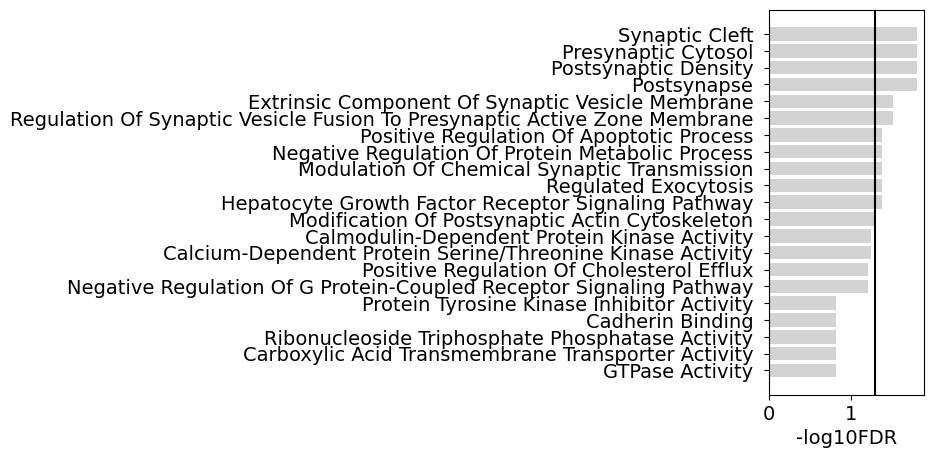

In [38]:
fig, ax = plt.subplots(figsize=(2,5))
terms = [x.split('(')[0] for x in df['Term'][::-1]]
plt.barh(terms,df['-log10FDR'][::-1],color='lightgray')
plt.axvline(-np.log10(0.05),color='k')
plt.xlabel('-log10FDR')

In [6]:
terms = ['Synaptic Cleft',
         'Presynaptic Cytosol',
         'Postsynaptic Density',
         'Postsynapse',
         'Synaptic Vesicle Membrane',
         'Active Zone',
         'Apoptosis',
         'Protein Metabolic Process',
         'Synaptic Transmission',
         'Regulated Exocytosis',
         'Hepatocyte Growth Factor']

In [7]:
df = df[:11]

In [15]:
df.reset_index(drop=True).iloc[5].Term

'Regulation Of Synaptic Vesicle Fusion To Presynaptic Active Zone Membrane (GO:0031630) BP'

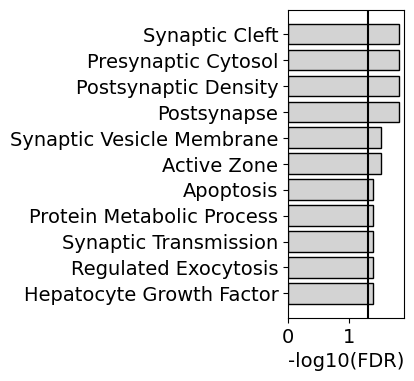

In [18]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.size'] = '14'

fig, ax = plt.subplots(figsize=(1.5,4))

ax.barh(np.arange(len(terms)), df['-log10FDR'], align='center', color='lightgray', edgecolor='black', linewidth=1)
ax.set_yticks(np.arange(df.shape[0]))
ax.set_yticklabels(terms)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('-log10(FDR)')
ax.axvline(-np.log10(0.05),color='k')
plt.savefig('/home/ah2428/PTSD_299_GO.pdf',bbox_inches='tight',dpi=300)

# Figure 2i: PTSD vs MDD EEF1A1 violin

In [2]:
ptsd_mdd = pg.read_input('/gpfs/gibbs/pi/gerstein/jz435/ShareZhangLab/PTSD/RNA/data/PTSD_MDD.zarr')

2023-09-28 22:43:02,560 - pegasusio.readwrite - INFO - zarr file '/gpfs/gibbs/pi/gerstein/jz435/ShareZhangLab/PTSD/RNA/data/PTSD_MDD.zarr' is loaded.
2023-09-28 22:43:02,561 - pegasusio.readwrite - INFO - Function 'read_input' finished in 351.93s.


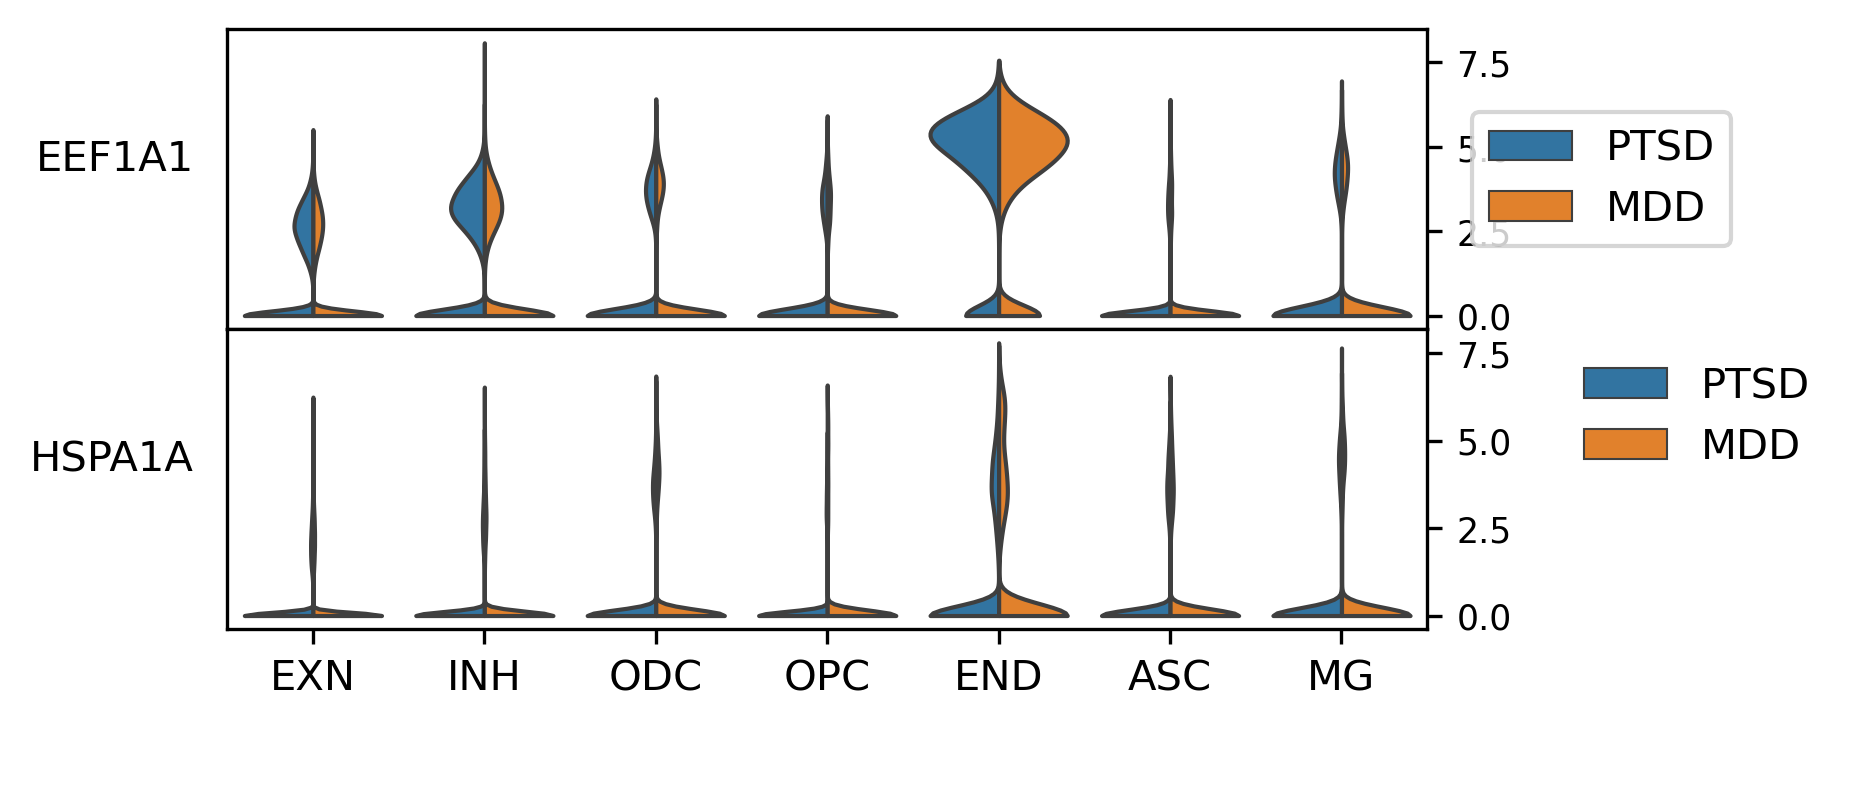

In [8]:
pg.violin(ptsd_mdd,attrs=['EEF1A1','HSPA1A'],groupby='class',hue='Condition',panel_size=(4,1))
plt.legend(frameon=False,bbox_to_anchor=(1.35,1))
plt.xlabel(' ')
plt.xticks(rotation=0)
plt.savefig('/home/ah2428/fig2_violin.pdf',bbox_inches='tight',dpi=300)